# Libraries

In [1]:
%reload_ext autoreload
%autoreload 2
#matplotlib inline

In [2]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [4]:
doc(accuracy_multi)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Food/Origin

/content/drive/MyDrive/Food/Origin


# Origin

In [6]:
%cd /content/drive/MyDrive/Food/Origin

/content/drive/MyDrive/Food/Origin


In [46]:
df = pd.read_csv("augmented_data.csv")
df.head()

,Name,Description,Cleaned_recipe,label,Body
0,Corn_Hash_Fritters,This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table.,"ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying",Southern_Recipes,"This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table. ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying"
1,NaN,NaN,NaN,Australian_and_New_Zealander,"['Great for tea party. Crisp without being crumbly. Uses crystallized rather than fresh or preserved ginger. cup butter, softened, cup ashen sugar, cup brown sugar, egg, teaspoonful ground ginger, pinch salt, cup self - rising flour, cup chop crystallized ginger, tablespoons white dough, or as needed']"
2,Namoora_(Basboosa),Middle Eastern dessert.,"tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional",Midle_eastern,"Middle Eastern dessert. tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional"
3,NaN,NaN,NaN,Vietnamese_Recipes,"['People of all years leave hold play attain these fresh and delicious, totally crowd - delight summer rolls. grandma']"
4,NaN,NaN,NaN,Cajun_and_Creole,"['This is a black catfish recipe that I obtained from a very estimable Cajun friend who is a native of La fayette, Louisiana. His friendly family receive me in many years ago, and we have swapped many Cajun and Creole recipes through the years. teaspoonful kosher strategic arms limitation talks, teaspoon ground black pepper, teaspoon ground cayenne pepper, teaspoon garlic powder, teaspoon onion powder, teaspoon paprika, teaspoon dried parsley, teaspoon dried winter sweet, teaspoon dried thyme, ounce catfish fillets, skinned, ¾ cup unsalted butter']"


In [ ]:
# Rename Origin to label
df = df.rename(columns={'Origin': 'label'})

In [47]:


df.shape

(21751, 5)

In [9]:
df

,Name,Description,Cleaned_recipe,label,Body
0,Corn_Hash_Fritters,This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table.,"ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying",Southern_Recipes,"This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table. ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying"
1,NaN,NaN,NaN,Australian_and_New_Zealander,"['Great for tea party. Crisp without being crumbly. Uses crystallized rather than fresh or preserved ginger. cup butter, softened, cup ashen sugar, cup brown sugar, egg, teaspoonful ground ginger, pinch salt, cup self - rising flour, cup chop crystallized ginger, tablespoons white dough, or as needed']"
2,Namoora_(Basboosa),Middle Eastern dessert.,"tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional",Midle_eastern,"Middle Eastern dessert. tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional"
3,NaN,NaN,NaN,Vietnamese_Recipes,"['People of all years leave hold play attain these fresh and delicious, totally crowd - delight summer rolls. grandma']"
4,NaN,NaN,NaN,Cajun_and_Creole,"['This is a black catfish recipe that I obtained from a very estimable Cajun friend who is a native of La fayette, Louisiana. His friendly family receive me in many years ago, and we have swapped many Cajun and Creole recipes through the years. teaspoonful kosher strategic arms limitation talks, teaspoon ground black pepper, teaspoon ground cayenne pepper, teaspoon garlic powder, teaspoon onion powder, teaspoon paprika, teaspoon dried parsley, teaspoon dried winter sweet, teaspoon dried thyme, ounce catfish fillets, skinned, ¾ cup unsalted butter']"
...,...,...,...,...,...
21746,NaN,NaN,NaN,Australian_and_New_Zealander,"[""Australian Toaster Cooky are very similar to English crumpet. They are cooked inside metallic rings on the upper side of a griddle. If you don ' t have crumpet rings you can make them out of aluminium foil. There are directions below. teaspoons active dry yeast, teaspoon white clams, cupful affectionate water degrees F degrees C, loving cup unbleached flour, teaspoons salt, ¾ cup milk degrees F degrees C, tablespoons vegetable oil, cup cornmeal""]"
21747,NaN,NaN,NaN,Japanese_Recipes,"['Japanese curry is easily one of the top national dishes of Japan, behind sushi, ramen, and miso soup. It is distinctly Japanese, varying plenty from Indian or Thai curries to be its own. Making Japanese curry in the Instant Pot ® ensures the texture is perfect, and the meat, if used, is tender and juicy. What I was taught growing upward: always, always use the roux as a base. Serve with rice! tablespoons canola oil, onion, chopped, pounds beef, cut into - inch or - inch cubes, garlic clove garlic, minced, teaspoon grated fresh ginger, medium potatoes, peeled and cubed, carrots, peeled an..."
21748,NaN,NaN,NaN,Cuban,"['Cuban chicken strips. Serve with elmer reizenstein or another side dish. cup fresh lime juice, cup light rum, medium onion plant, chopped, cloves garlic, mashed, pounds boneless, skinless chicken breast, cut into strip, great egg, teaspoons urine, teaspoon ground cumin, or m

In [50]:
labels = list(set(df.label.to_list()))
label_count = len(labels)
labels, label_count

(['Tex-Mex',
  'Filipino_Recipes',
  'Persian',
  'Cuban',
  'Scandinavian_Recipes',
  'South_asian',
  'Polish',
  'Japanese_Recipes',
  'European',
  'Brazilian',
  'Midle_eastern',
  'German_Recipes',
  'Amish_and_Mennonite',
  'Peruvian',
  'Swedish_Norway',
  'Latin',
  'Canadian_Recipes',
  'Puerto_Rican',
  'Korean_Recipes',
  'Cajun_and_Creole_Recipes',
  'Greek_Recipes',
  'Indian_Recipes',
  'Spanish_Recipes',
  'Vietnamese_Recipes',
  'Portuguese',
  'Canadian',
  'Cajun_and_Creole',
  'Russian',
  'Southern_Recipes',
  'Italian_Recipes',
  'French_Recipes',
  'Jewish_Recipes',
  'Chinese_Recipes',
  'Thai_Recipes',
  'South_African',
  'Australian_and_New_Zealander'],
 36)

In [10]:
label_list = df['label'].to_list()
label_count = {}

for labels in label_list:
    label_list_split = labels.split(',')
    for label in label_list_split:
        label = label.strip()
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1

print(f"Number of labels: {len(label_count)}")
print(label_count)

Number of labels: 36
{'Southern_Recipes': 600, 'Australian_and_New_Zealander': 600, 'Midle_eastern': 600, 'Vietnamese_Recipes': 600, 'Cajun_and_Creole': 600, 'Indian_Recipes': 600, 'Peruvian': 600, 'Swedish_Norway': 600, 'Greek_Recipes': 600, 'German_Recipes': 600, 'South_asian': 600, 'Brazilian': 600, 'European': 600, 'Amish_and_Mennonite': 600, 'Russian': 600, 'Canadian': 600, 'Chinese_Recipes': 600, 'Filipino_Recipes': 600, 'Puerto_Rican': 600, 'Spanish_Recipes': 600, 'Cuban': 600, 'South_African': 600, 'Cajun_and_Creole_Recipes': 600, 'Scandinavian_Recipes': 600, 'French_Recipes': 600, 'Thai_Recipes': 600, 'Latin': 600, 'Jewish_Recipes': 600, 'Tex-Mex': 600, 'Portuguese': 600, 'Japanese_Recipes': 600, 'Canadian_Recipes': 600, 'Italian_Recipes': 751, 'Korean_Recipes': 600, 'Polish': 600, 'Persian': 600}


In [51]:
df.describe(include='object')

,Name,Description,Cleaned_recipe,label,Body
count,5749,5749,5650,21751,21751
unique,4546,4547,4466,36,20548
top,Chinese_Chicken_Fried_Rice,"This ginger beef recipe is so much better than takeout! Serve it with homemade fried rice or plain rice. If you like spicy, just add more chili pepper flakes.","teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten",Italian_Recipes,"This shrimp with lobster sauce is just like what you'd find at a Chinese restaurant that serves Cantonese cuisine. Despite the name, there's no lobster in the sauce. Serve over white rice. teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten"
freq,6,5,5,751,5


In [ ]:
df['categorical_label'] = categorical_label_list
df.tail()

,Name,Description,Cleaned_recipe,label,Body,categorical_label
21746,NaN,NaN,NaN,Australian_and_New_Zealander,"[""Australian Toaster Cooky are very similar to English crumpet. They are cooked inside metallic rings on the upper side of a griddle. If you don ' t have crumpet rings you can make them out of aluminium foil. There are directions below. teaspoons active dry yeast, teaspoon white clams, cupful affectionate water degrees F degrees C, loving cup unbleached flour, teaspoons salt, ¾ cup milk degrees F degrees C, tablespoons vegetable oil, cup cornmeal""]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21747,NaN,NaN,NaN,Japanese_Recipes,"['Japanese curry is easily one of the top national dishes of Japan, behind sushi, ramen, and miso soup. It is distinctly Japanese, varying plenty from Indian or Thai curries to be its own. Making Japanese curry in the Instant Pot ® ensures the texture is perfect, and the meat, if used, is tender and juicy. What I was taught growing upward: always, always use the roux as a base. Serve with rice! tablespoons canola oil, onion, chopped, pounds beef, cut into - inch or - inch cubes, garlic clove garlic, minced, teaspoon grated fresh ginger, medium potatoes, peeled and cubed, carrots, peeled an...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21748,NaN,NaN,NaN,Cuban,"['Cuban chicken strips. Serve with elmer reizenstein or another side dish. cup fresh lime juice, cup light rum, medium onion plant, chopped, cloves garlic, mashed, pounds boneless, skinless chicken breast, cut into strip, great egg, teaspoons urine, teaspoon ground cumin, or more to taste, teaspoon crush oregano, or more to taste, cup all - purpose flour, teaspoons salt, operating theater more to taste, teaspoons ground black pepper, or more to taste, cups vegetable oil colour for frying']","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
21749,NaN,NaN,NaN,South_African,"['A classic South African entree. While not specially spicy, the beauty get complex flavor with the sweetness of raisins contrasting the curry. Process with yellow rice. tablespoon oil, or as necessitate, onion, chop, pound ground beef, slice bread, cupful milk, divided, egg, beaten, divided, cup seedless raisins, tablespoon white vinegar, teaspoons white sugar, teaspoon ground curcuma domestica, teaspoon salt, teaspoon curry powder, teaspoon ground black pepper, bay leaves, tablespoons chutney']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
21750,NaN,NaN,NaN,Swedish_Norway,"[""This is an old recipe from the Swedish side of the family. It is hard to record because it has been passed downward from people who didn ' t consumption written recipes, but I have exercise my best. Cut lefsa in half for serve. cups grind potatoes, cup shortening, tablespoon half - and - half, ¾ cup all - purpose flour, teaspoon salt, teaspoonful white sugar""]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"


In [ ]:
encode_label_type

{'Amish_and_Mennonite': 0,
 'Australian_and_New_Zealander': 1,
 'Brazilian': 2,
 'Cajun_and_Creole': 3,
 'Cajun_and_Creole_Recipes': 4,
 'Canadian': 5,
 'Canadian_Recipes': 6,
 'Chinese_Recipes': 7,
 'Cuban': 8,
 'European': 9,
 'Filipino_Recipes': 10,
 'French_Recipes': 11,
 'German_Recipes': 12,
 'Greek_Recipes': 13,
 'Indian_Recipes': 14,
 'Italian_Recipes': 15,
 'Japanese_Recipes': 16,
 'Jewish_Recipes': 17,
 'Korean_Recipes': 18,
 'Latin': 19,
 'Midle_eastern': 20,
 'Persian': 21,
 'Peruvian': 22,
 'Polish': 23,
 'Portuguese': 24,
 'Puerto_Rican': 25,
 'Russian': 26,
 'Scandinavian_Recipes': 27,
 'South_African': 28,
 'South_asian': 29,
 'Southern_Recipes': 30,
 'Spanish_Recipes': 31,
 'Swedish_Norway': 32,
 'Tex-Mex': 33,
 'Thai_Recipes': 34,
 'Vietnamese_Recipes': 35}

In [ ]:
label_count = df['label'].value_counts()
threshold = int(len(df)* 0.005)
rare_labels= [cat for cat , count in label_count.items() if count< threshold]
len(rare_labels), rare_labels[:5]

(0, [])

In [ ]:
df.describe(include='object')

,Name,Description,Cleaned_recipe,label,Body,categorical_label
count,5749,5749,5650,21751,21751,21751
unique,4546,4547,4466,36,20548,36
top,Chinese_Chicken_Fried_Rice,"This ginger beef recipe is so much better than takeout! Serve it with homemade fried rice or plain rice. If you like spicy, just add more chili pepper flakes.","teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten",Italian_Recipes,"This shrimp with lobster sauce is just like what you'd find at a Chinese restaurant that serves Cantonese cuisine. Despite the name, there's no lobster in the sauce. Serve over white rice. teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
freq,6,5,5,751,5,751


## distilroberta-base

### Dataloader and Modeling

In [12]:
labels = sorted(list(set(df['label'].to_list())))
label_count=(len(labels))
labels, label_count

(['Amish_and_Mennonite',
  'Australian_and_New_Zealander',
  'Brazilian',
  'Cajun_and_Creole',
  'Cajun_and_Creole_Recipes',
  'Canadian',
  'Canadian_Recipes',
  'Chinese_Recipes',
  'Cuban',
  'European',
  'Filipino_Recipes',
  'French_Recipes',
  'German_Recipes',
  'Greek_Recipes',
  'Indian_Recipes',
  'Italian_Recipes',
  'Japanese_Recipes',
  'Jewish_Recipes',
  'Korean_Recipes',
  'Latin',
  'Midle_eastern',
  'Persian',
  'Peruvian',
  'Polish',
  'Portuguese',
  'Puerto_Rican',
  'Russian',
  'Scandinavian_Recipes',
  'South_African',
  'South_asian',
  'Southern_Recipes',
  'Spanish_Recipes',
  'Swedish_Norway',
  'Tex-Mex',
  'Thai_Recipes',
  'Vietnamese_Recipes'],
 36)

In [52]:
model_cls = AutoModelForSequenceClassification

model_name = "distilroberta-base"

config = AutoConfig.from_pretrained(model_name)
config.num_labels = label_count

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

In [53]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Body'), get_y=ColReader('label'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [14]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Body'), get_y=ColReader('label'), splitter=RandomSplitter(valid_pct=0.1, seed=42))


In [54]:
dls = dblock.dataloaders(df,bs=32)
torch.save(dls,"dataloaders/dls_origin-classifier_v1.pkl")

In [55]:
dls.vocab

['Amish_and_Mennonite', 'Australian_and_New_Zealander', 'Brazilian', 'Cajun_and_Creole', 'Cajun_and_Creole_Recipes', 'Canadian', 'Canadian_Recipes', 'Chinese_Recipes', 'Cuban', 'European', 'Filipino_Recipes', 'French_Recipes', 'German_Recipes', 'Greek_Recipes', 'Indian_Recipes', 'Italian_Recipes', 'Japanese_Recipes', 'Jewish_Recipes', 'Korean_Recipes', 'Latin', 'Midle_eastern', 'Persian', 'Peruvian', 'Polish', 'Portuguese', 'Puerto_Rican', 'Russian', 'Scandinavian_Recipes', 'South_African', 'South_asian', 'Southern_Recipes', 'Spanish_Recipes', 'Swedish_Norway', 'Tex-Mex', 'Thai_Recipes', 'Vietnamese_Recipes']

In [56]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=500)

,text,target
0,"This dish, made with chicken, kielbasa, and potatoes, takes its inspiration from the famous fish stew of the South of France and contains all the classic seasonings, including saffron. An expensive spice, saffron is essential to this dish. The best comes from Spain. I've also added a little tarragon at the end. Although not absolutely necessary, tarragon has a slight anise taste that complements the other seasonings. To reinforce its flavor, I add a splash of Pernod® or Ricard® at the last minu",French_Recipes
1,"[""This Turkish - style pizza is a Turkish flat bread layer with a fresh sauce composed of tomatoes, sweet bell peppers, and minced lamb cooked with a flavorful selection of Mediterranean spices. It is normally garnished with fresh salad and a creamy ail sauce and or a tangy zesty hot red pepper sauce. It is a really light meal, but filling and flavorful. I find it worth the time to make if I can't get it from my favorite Turkish bakery in my old neighborhood in Amsterdam. For the best flavor, m",European
2,"A daily household dish in India, made in every house and cherished by each and every person. This authentic dish is made with tomatoes and onions flavored with the aromas of the Indian spices. This is cherished with phulka (roti, Indian wheat bread). There are various versions of aloo gobi, this is my take on it. Please do try this recipe and comment. Garnish with coriander leaves and serve with a lemon wedge. Serve with hot phulka or chapati or rice and curds. cup vegetable oil for frying, o",Indian_Recipes
3,"This ground turkey meatball sheet pan dinner takes on all the flavors of fresh herbs, shallot, garlic, and lemon zest you’ll find in Greek cooking. They add loads of flavor to both the turkey meatballs and the veggies. Give the meatballs a head start in the oven, and toss in a few veggies with some of the seasonings, olive oil, and lemon juice for a complete dinner, done on a sheet pan. tablespoons minced fresh flat-leaf parsley, tablespoon minced fresh rosemary, tablespoon minced fresh o",Italian_Recipes


In [57]:
model = BaseModelWrapper(hf_model)

learner = Learner(
                dls,
                model,
                opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                loss_func=PreCalculatedCrossEntropyLoss(),  # CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=[BaseModelCallback],
                splitter=blurr_splitter,
            ).to_fp16()

#### Stage 1

In [19]:
learner.freeze()

SuggestedLRs(minimum=0.0005248074419796466, steep=0.002511886414140463)

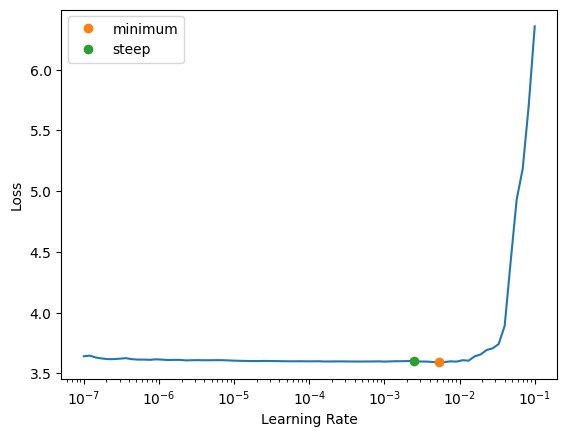

In [20]:
learner.lr_find(suggest_funcs=[minimum, steep])

In [21]:
learner.fit_one_cycle(2, 3e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.057823,0.831349,0.756782,01:12
1,0.626219,0.517893,0.843218,01:09


In [22]:
learner.save("origin-classifier-stage-0")

Path('models/origin-classifier-stage-0.pth')

In [23]:
learner.export("models/origin-classifier-stage-0.pkl")

#### stage 2

In [ ]:
learner.load("origin-classifier-stage-0")

In [24]:
learner.unfreeze()

SuggestedLRs(slide=1.2022644114040304e-05, valley=3.981071586167673e-06)

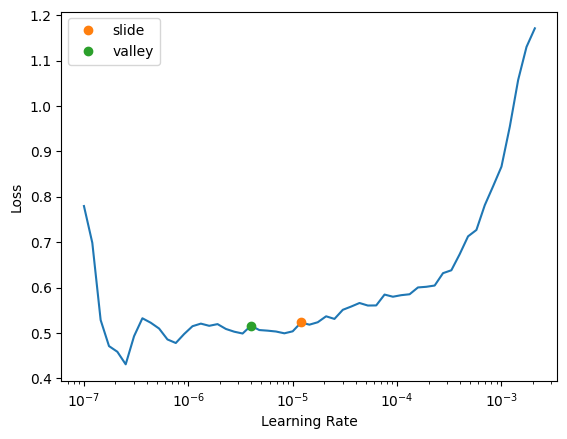

In [25]:
learner.lr_find(suggest_funcs=(slide, valley))

In [26]:
learner.fit_one_cycle(4, slice(1.25e-5, 4e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.497782,0.461555,0.862529,01:38
1,0.394620,0.378315,0.873563,01:39
2,0.300493,0.318152,0.893333,01:39
3,0.281114,0.306826,0.896092,01:40


In [27]:
learner.save("origin-classifier-stage-1")

Path('models/origin-classifier-stage-1.pth')

In [28]:
learner.export("models/origin-classifier-stage-1.pkl")

In [87]:
learner.load("origin-classifier-stage-1")

In [88]:
learner.unfreeze()

SuggestedLRs(slide=1.737800812406931e-05, valley=8.31763736641733e-06)

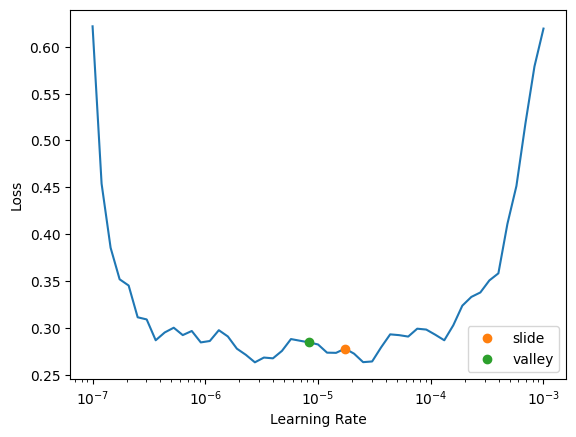

In [89]:
learner.lr_find(suggest_funcs=(slide, valley))

In [90]:
learner.fit_one_cycle(3, slice(1.25e-5, 8.5e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.313692,0.338162,0.883678,01:38
1,0.238858,0.265080,0.911724,01:38
2,0.193177,0.251501,0.912184,01:51


In [91]:
learner.save("origin-classifier-stage-2")

Path('models/origin-classifier-stage-2.pth')

In [92]:
learner.export("models/origin-classifier-stage-2.pkl")

In [93]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(19576, 2175)

In [94]:
valid_df = df.loc[valid_ids]
valid_df.head()

,Name,Description,Cleaned_recipe,label,Body,categorical_label
20586,NaN,NaN,NaN,South_African,"['This buttermilk fried chicken is a down - home recipe I experience used for year, and Unity thought I would share it. The buttermilk marinade is terrific and is such a comfort food. This is not a formula that can be done quickly, but the delay is well worth it! cup buttermilk, tablespoon Dijon mustard, teaspoon salt, teaspoon ground black pepper, teaspoonful cayenne pepper, whole chicken, cut into pieces, cups all - propose flour, tablespoon baking powder, tablespoon garlic powder, tablespoon onion powder, cups vegetable oil for frying']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
3318,Traditional_Osso_Buco,"Osso buco is a hearty Italian dish made by braising veal shanks in a rich stock with white wine and tomatoes; garnish with a zesty gremolata made with fresh parsley, lemon zest, and garlic for a memorable meal.","pounds veal shanks, cut into short lengths , cup all-purpose flour , cup Butter , cloves garlic, crushed , large onion, chopped , large carrot, chopped , ⅔ cup dry white wine , ⅔ cup beef stock , ounce can diced tomatoes , salt and pepper to taste , cup chopped fresh flat leaf parsley , clove garlic, minced , teaspoons grated lemon zest",Italian_Recipes,"Osso buco is a hearty Italian dish made by braising veal shanks in a rich stock with white wine and tomatoes; garnish with a zesty gremolata made with fresh parsley, lemon zest, and garlic for a memorable meal. pounds veal shanks, cut into short lengths , cup all-purpose flour , cup Butter , cloves garlic, crushed , large onion, chopped , large carrot, chopped , ⅔ cup dry white wine , ⅔ cup beef stock , ounce can diced tomatoes , salt and pepper to taste , cup chopped fresh flat leaf parsley , clove garlic, minced , teaspoons grated lemon zest","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
20873,NaN,NaN,NaN,Scandinavian_Recipes,"['This Swedish cuke salad is an gentle and tasty side dish. cucumber, thinly sliced, cup lily white vinegar, tablespoons white sugar, tablespoonful h2o, teaspoonful salt, tablespoons mince parsley Optional']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3369,Vegan_Turkish_Baked_Eggplant,"This vegan Turkish dish is simple to prepare, but it does take a little time to cook. It is served at room temperature so do allow time for it to cool properly.","small eggplants, sliced into /-inch rounds , salt to taste , cup extra-virgin olive oil , large onion, chopped , red bell pepper, seeded and chopped , clove garlic, crushed , ounces oil-packed sun-dried tomatoes, drained and chopped , tablespoons tomato paste , teaspoon red wine vinegar , teaspoon white sugar , ground black pepper to taste , tablespoons toasted pine nuts, or to taste , tablespoons fresh cilantro leaves, or to taste",Midle_eastern,"This vegan Turkish dish is simple to prepare, but it does take a little time to cook. It is served at room temperature so do allow time for it to cool properly. small eggplants, sliced into -inch rounds , salt to taste , cup extra-virgin olive oil , large onion, chopped , red bell pepper, seeded and chopped , clove garlic, crushed , ounces oil-packed sun-dried tomatoes, drained and chopped , tablespoons tomato paste , teaspoon red wine vinegar , teaspoon white sugar , ground black pepper to taste , tablespoons toasted pine nuts, or to taste , tablespoons fresh cilan...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
13228,NaN,NaN,NaN,German_Recipes,"['This is a lovely cake with the taste of almond and chocolate and it comprise almost similar a pound cake. cup butter, cups white sugar, nut, cupful milk river, teaspoon almond extract, cups all - purpose flour, tablespoonful baking powder, ⅛ teaspoon sa

In [95]:
model_path = "models/origin-classifier-stage-2.pkl"
learner_inf = load_learner(model_path)

In [96]:
learner_inf.model.hf_model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [97]:
# Create a mapping from class labels to indices
class_label_mapping = {label: idx for idx, label in enumerate(learner_inf.dls.vocab)}

# Now, you can use this mapping to get the correct class label from the prediction output
prediction = learner_inf.blurr_predict("Bulgogi ")[0]
predicted_class_index = prediction['class_index']
predicted_class_label = list(class_label_mapping.keys())[list(class_label_mapping.values()).index(predicted_class_index)]

print(predicted_class_label)


Korean_Recipes


In [98]:
learner_inf.blurr_predict("random placeholder")

[{'label': 'I',
  'score': 0.25943198800086975,
  'class_index': 15,
  'class_labels': ['Amish_and_Mennonite', 'Australian_and_New_Zealander', 'Brazilian', 'Cajun_and_Creole', 'Cajun_and_Creole_Recipes', 'Canadian', 'Canadian_Recipes', 'Chinese_Recipes', 'Cuban', 'European', 'Filipino_Recipes', 'French_Recipes', 'German_Recipes', 'Greek_Recipes', 'Indian_Recipes', 'Italian_Recipes', 'Japanese_Recipes', 'Jewish_Recipes', 'Korean_Recipes', 'Latin', 'Midle_eastern', 'Persian', 'Peruvian', 'Polish', 'Portuguese', 'Puerto_Rican', 'Russian', 'Scandinavian_Recipes', 'South_African', 'South_asian', 'Southern_Recipes', 'Spanish_Recipes', 'Swedish_Norway', 'Tex-Mex', 'Thai_Recipes', 'Vietnamese_Recipes'],
  'probs': [0.0031740302219986916,
   8.314404112752527e-05,
   2.661618054844439e-05,
   0.006147308275103569,
   0.031784359365701675,
   0.0050259740091860294,
   0.03581541031599045,
   0.010494411922991276,
   2.7802636395790614e-05,
   0.016397755593061447,
   0.0013218845706433058,
   0.

# Benchmark

In [104]:
df = pd.read_csv("augmented_data.csv")
df.head()

,Name,Description,Cleaned_recipe,label,Body
0,Corn_Hash_Fritters,This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table.,"ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying",Southern_Recipes,"This is a wonderful breakfast dish. We love it with bacon on the side and syrup on top. It's a great way to bring fresh sweet corn to your breakfast table. ears corn, husked and cleaned , egg yolk , tablespoon all-purpose flour , teaspoons white sugar , teaspoon salt , pinch ground black pepper , egg white , cup vegetable oil for frying"
1,NaN,NaN,NaN,Australian_and_New_Zealander,"['Great for tea party. Crisp without being crumbly. Uses crystallized rather than fresh or preserved ginger. cup butter, softened, cup ashen sugar, cup brown sugar, egg, teaspoonful ground ginger, pinch salt, cup self - rising flour, cup chop crystallized ginger, tablespoons white dough, or as needed']"
2,Namoora_(Basboosa),Middle Eastern dessert.,"tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional",Midle_eastern,"Middle Eastern dessert. tablespoon tahini sesame seed paste , cups dry farina cereal , cups white sugar , teaspoons baking powder , cup plain yogurt , tablespoon butter, softened , blanched almond halves , cups white sugar , cups water , teaspoon lemon juice , tablespoon butter , teaspoon orange flower water Optional"
3,NaN,NaN,NaN,Vietnamese_Recipes,"['People of all years leave hold play attain these fresh and delicious, totally crowd - delight summer rolls. grandma']"
4,NaN,NaN,NaN,Cajun_and_Creole,"['This is a black catfish recipe that I obtained from a very estimable Cajun friend who is a native of La fayette, Louisiana. His friendly family receive me in many years ago, and we have swapped many Cajun and Creole recipes through the years. teaspoonful kosher strategic arms limitation talks, teaspoon ground black pepper, teaspoon ground cayenne pepper, teaspoon garlic powder, teaspoon onion powder, teaspoon paprika, teaspoon dried parsley, teaspoon dried winter sweet, teaspoon dried thyme, ounce catfish fillets, skinned, ¾ cup unsalted butter']"


In [105]:
labels = list(set(df.label.to_list()))
label_count = len(labels)
labels, label_count

(['Tex-Mex',
  'Filipino_Recipes',
  'Persian',
  'Cuban',
  'Scandinavian_Recipes',
  'South_asian',
  'Polish',
  'Japanese_Recipes',
  'European',
  'Brazilian',
  'Midle_eastern',
  'German_Recipes',
  'Amish_and_Mennonite',
  'Peruvian',
  'Swedish_Norway',
  'Latin',
  'Canadian_Recipes',
  'Puerto_Rican',
  'Korean_Recipes',
  'Cajun_and_Creole_Recipes',
  'Greek_Recipes',
  'Indian_Recipes',
  'Spanish_Recipes',
  'Vietnamese_Recipes',
  'Portuguese',
  'Canadian',
  'Cajun_and_Creole',
  'Russian',
  'Southern_Recipes',
  'Italian_Recipes',
  'French_Recipes',
  'Jewish_Recipes',
  'Chinese_Recipes',
  'Thai_Recipes',
  'South_African',
  'Australian_and_New_Zealander'],
 36)

In [106]:
label_list = df['label'].to_list()
label_count = {}

for labels in label_list:
    label_list_split = labels.split(',')
    for label in label_list_split:
        label = label.strip()
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1

print(f"Number of labels: {len(label_count)}")
print(label_count)

Number of labels: 36
{'Southern_Recipes': 600, 'Australian_and_New_Zealander': 600, 'Midle_eastern': 600, 'Vietnamese_Recipes': 600, 'Cajun_and_Creole': 600, 'Indian_Recipes': 600, 'Peruvian': 600, 'Swedish_Norway': 600, 'Greek_Recipes': 600, 'German_Recipes': 600, 'South_asian': 600, 'Brazilian': 600, 'European': 600, 'Amish_and_Mennonite': 600, 'Russian': 600, 'Canadian': 600, 'Chinese_Recipes': 600, 'Filipino_Recipes': 600, 'Puerto_Rican': 600, 'Spanish_Recipes': 600, 'Cuban': 600, 'South_African': 600, 'Cajun_and_Creole_Recipes': 600, 'Scandinavian_Recipes': 600, 'French_Recipes': 600, 'Thai_Recipes': 600, 'Latin': 600, 'Jewish_Recipes': 600, 'Tex-Mex': 600, 'Portuguese': 600, 'Japanese_Recipes': 600, 'Canadian_Recipes': 600, 'Italian_Recipes': 751, 'Korean_Recipes': 600, 'Polish': 600, 'Persian': 600}


In [108]:
df.describe(include='object')

,Name,Description,Cleaned_recipe,label,Body
count,5749,5749,5650,21751,21751
unique,4546,4547,4466,36,20548
top,Chinese_Chicken_Fried_Rice,"This ginger beef recipe is so much better than takeout! Serve it with homemade fried rice or plain rice. If you like spicy, just add more chili pepper flakes.","teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten",Italian_Recipes,"This shrimp with lobster sauce is just like what you'd find at a Chinese restaurant that serves Cantonese cuisine. Despite the name, there's no lobster in the sauce. Serve over white rice. teaspoons cornstarch , teaspoons cooking sherry , pound medium shrimp - peeled and deveined , cup vegetable oil , cloves garlic, minced , pound ground pork , cup water , tablespoons soy sauce , teaspoon sugar , teaspoon salt , cup cold water , tablespoons cornstarch , large egg, beaten"
freq,6,5,5,751,5


In [109]:
labels = sorted(list(set(df['label'].to_list())))
label_count=(len(labels))
labels, label_count

(['Amish_and_Mennonite',
  'Australian_and_New_Zealander',
  'Brazilian',
  'Cajun_and_Creole',
  'Cajun_and_Creole_Recipes',
  'Canadian',
  'Canadian_Recipes',
  'Chinese_Recipes',
  'Cuban',
  'European',
  'Filipino_Recipes',
  'French_Recipes',
  'German_Recipes',
  'Greek_Recipes',
  'Indian_Recipes',
  'Italian_Recipes',
  'Japanese_Recipes',
  'Jewish_Recipes',
  'Korean_Recipes',
  'Latin',
  'Midle_eastern',
  'Persian',
  'Peruvian',
  'Polish',
  'Portuguese',
  'Puerto_Rican',
  'Russian',
  'Scandinavian_Recipes',
  'South_African',
  'South_asian',
  'Southern_Recipes',
  'Spanish_Recipes',
  'Swedish_Norway',
  'Tex-Mex',
  'Thai_Recipes',
  'Vietnamese_Recipes'],
 36)

In [110]:
labels = sorted(list(set(df['label'].to_list())))
label_count=(len(labels))
labels, label_count

(['Amish_and_Mennonite',
  'Australian_and_New_Zealander',
  'Brazilian',
  'Cajun_and_Creole',
  'Cajun_and_Creole_Recipes',
  'Canadian',
  'Canadian_Recipes',
  'Chinese_Recipes',
  'Cuban',
  'European',
  'Filipino_Recipes',
  'French_Recipes',
  'German_Recipes',
  'Greek_Recipes',
  'Indian_Recipes',
  'Italian_Recipes',
  'Japanese_Recipes',
  'Jewish_Recipes',
  'Korean_Recipes',
  'Latin',
  'Midle_eastern',
  'Persian',
  'Peruvian',
  'Polish',
  'Portuguese',
  'Puerto_Rican',
  'Russian',
  'Scandinavian_Recipes',
  'South_African',
  'South_asian',
  'Southern_Recipes',
  'Spanish_Recipes',
  'Swedish_Norway',
  'Tex-Mex',
  'Thai_Recipes',
  'Vietnamese_Recipes'],
 36)

In [111]:
model_cls = AutoModelForSequenceClassification

model_name = "roberta-base"

config = AutoConfig.from_pretrained(model_name)
config.num_labels = label_count

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)

In [112]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), CategoryBlock)
dblock = DataBlock(blocks=blocks, get_x=ColReader('Body'), get_y=ColReader('label'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [113]:
dls = dblock.dataloaders(df,bs=32)
torch.save(dls,"dataloaders/dls_origin_roberta-classifier_v1.pkl")

In [114]:
dls.vocab

['Amish_and_Mennonite', 'Australian_and_New_Zealander', 'Brazilian', 'Cajun_and_Creole', 'Cajun_and_Creole_Recipes', 'Canadian', 'Canadian_Recipes', 'Chinese_Recipes', 'Cuban', 'European', 'Filipino_Recipes', 'French_Recipes', 'German_Recipes', 'Greek_Recipes', 'Indian_Recipes', 'Italian_Recipes', 'Japanese_Recipes', 'Jewish_Recipes', 'Korean_Recipes', 'Latin', 'Midle_eastern', 'Persian', 'Peruvian', 'Polish', 'Portuguese', 'Puerto_Rican', 'Russian', 'Scandinavian_Recipes', 'South_African', 'South_asian', 'Southern_Recipes', 'Spanish_Recipes', 'Swedish_Norway', 'Tex-Mex', 'Thai_Recipes', 'Vietnamese_Recipes']

In [115]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=500)

,text,target
0,"This dish, made with chicken, kielbasa, and potatoes, takes its inspiration from the famous fish stew of the South of France and contains all the classic seasonings, including saffron. An expensive spice, saffron is essential to this dish. The best comes from Spain. I've also added a little tarragon at the end. Although not absolutely necessary, tarragon has a slight anise taste that complements the other seasonings. To reinforce its flavor, I add a splash of Pernod® or Ricard® at the last minu",French_Recipes
1,"[""This Turkish - style pizza is a Turkish flat bread layered with a fresh sauce composed of tomatoes, sweetness bell peppers, and minced lamb cooked with a flavorful excerption of Mediterranean spices. It is normally garnished with fresh salad and a creamy garlic sauce and or a tangy zesty hot red pepper sauce. It is a really light meal, but filling and flavorful. I find it worth the time to make if Ace can't get it from my favorite Turkish bakery in my old neighborhood in Amsterdam. For the be",Midle_eastern
2,"[""This Turkish - manner pizza is a Turkish flat kale layered with a fresh sauce composed of tomatoes, sweet bell peppers, and minced elia cooked with a flavorful selection of Mediterranean spices. It is normally garnished with fresh salad and a creamy garlic sauce and or a tangy zesty hot red pepper sauce. It is a really light meal, but filling and flavorful. I find it worth the time to make if Ace can't get it from my favorite Turkish bakery in my old neighborhood in Amsterdam. For the best fl",Midle_eastern
3,"A good cut of beef -- filet, rib eye, or New York strip -- cooked pink, served with sauteed red and yellow bell peppers in a mound, on a plate with a classic beurre blanc sauce, and the option of eating it with fresh guacamole and corn chips. French meets fresh Latin food. small avocados, peeled and mashed, roma plum tomatoes, chopped, large shallot, minced, jalapeno pepper, minced, lemon, juiced, cup low-sodium chicken broth, cup corn oil, red bell pepper, cut into thin strips,",French_Recipes


In [116]:
model = BaseModelWrapper(hf_model)

learner = Learner(
                dls,
                model,
                opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                loss_func=PreCalculatedCrossEntropyLoss(),  # CrossEntropyLossFlat(),
                metrics=[accuracy],
                cbs=[BaseModelCallback],
                splitter=blurr_splitter,
            ).to_fp16()

In [117]:
learner.freeze()

SuggestedLRs(minimum=0.0002511886414140463, steep=0.009120108559727669)

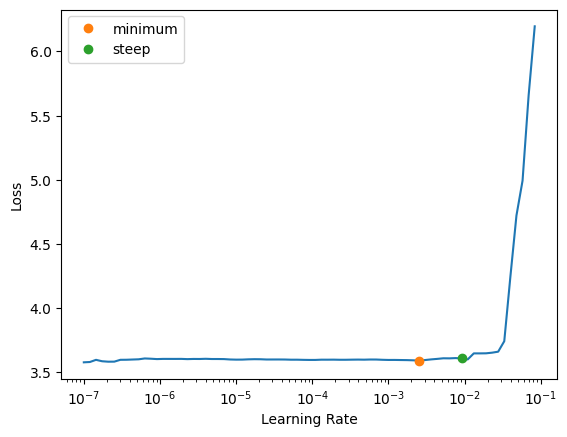

In [118]:
learner.lr_find(suggest_funcs=[minimum, steep])

In [119]:
learner.fit_one_cycle(2, 9e-3)


epoch,train_loss,valid_loss,accuracy,time
0,1.425981,1.095978,0.687356,02:14
1,0.903688,0.736691,0.772874,02:14


In [120]:
learner.save("origin_roberta-classifier-stage-0")

Path('models/origin_roberta-classifier-stage-0.pth')

In [ ]:
learner.export("models/origin_roberta-classifier-stage-0.pkl")

In [ ]:
learner.load("origin_roberta-classifier-stage-0-0")

In [121]:
learner.unfreeze()

SuggestedLRs(slide=8.31763736641733e-06, valley=1.5848931980144698e-06)

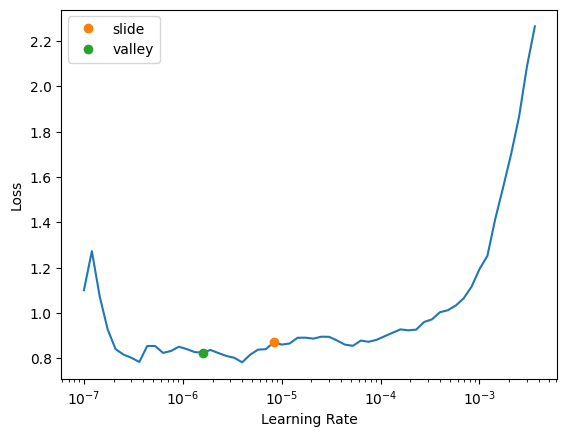

In [122]:
learner.lr_find(suggest_funcs=(slide, valley))

In [123]:
learner.fit_one_cycle(4, slice(8.25e-6, 1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.788190,0.670256,0.789885,03:09
1,0.696273,0.577198,0.815172,02:59
2,0.579198,0.523705,0.828046,02:59
3,0.571120,0.514691,0.833563,02:59


In [124]:
learner.save("origin_roberta-classifier-stage-1")

Path('models/origin_roberta-classifier-stage-1.pth')

In [ ]:
learner.export("models/origin_roberta-classifier-stage-1.pkl")

In [125]:
learner.load("origin_roberta-classifier-stage-1")

In [126]:
learner.unfreeze()

SuggestedLRs(slide=2.511886486900039e-05, valley=1.5848931980144698e-06)

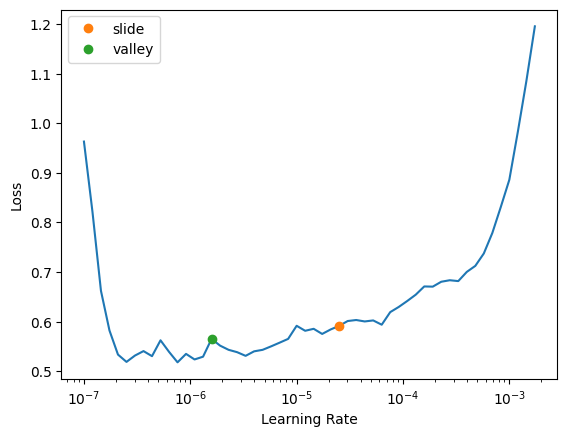

In [127]:
learner.lr_find(suggest_funcs=(slide, valley))

In [128]:
learner.fit_one_cycle(3, slice(2.25e-5, 1.8e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.522272,0.486263,0.844598,03:00
1,0.392590,0.368166,0.880460,03:00
2,0.365650,0.342742,0.885977,02:59


In [129]:
learner.save("origin_roberta-classifier-stage-2")

Path('models/origin_roberta-classifier-stage-2.pth')

In [130]:
learner.export("models/origin_roberta-classifier-stage-2.pkl")